In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import datetime
import pandas as pd
import pandas_datareader.data as web
import numpy as np

*(below cells are for reference)*

In [ ]:
# scale as percentage of maximum
for item in df_tech.columns:
    df_tech[item] = df_tech[item]/df_tech[item].max()
df_tech.plot()
plt.title('Scale as % of Maximum')
plt.show()

In [ ]:
# scale as percentage of starting value
for item in df_tech.columns:
    df_tech[item] = df_tech[item]/df_tech[item][0]
df_tech.plot()
plt.title('Scale as % of Maximum')
plt.show()

**Might want to re-sample**

In [ ]:
# slide 66
# Resample values in df and assign to new variable df_q
df_q = df_tech.resample('W').ffill()

# Visualize values stored in df_q
df_q['1999':'2000'].plot()
plt.title('Resampled Quarterly')
plt.show()


In [ ]:
# scale as percentage of maximum
df_filtered = df_tech[df_tech > 10]
df_filtered.plot()
plt.title('Filtered')
plt.show()

In [ ]:
# slide 68
df_tech1 = df_tech["2001":"2002"]
df_tech2 = df_tech["2010":"2011"]
df_comb = pd.concat([df_tech1, df_tech2])

df_comb.plot()
plt.title('Separate and Concatenate')
plt.show()

In [ ]:
# slide 69
df_q = df_tech.resample('Q').ffill()
returns = df_q.pct_change(periods=1)
returns.plot()
plt.title('Quarterly Returns')
plt.show()

See [here for documentation on pct_chagne](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.pct_change.html). 

[Help: Frequency String Documentation](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

## Step 6: Compute Bollinger Bands

Compute and visualize the Bollinger Bands in the following cell. You can use the code from the slides as a reference.

In [ ]:
# slide 72 - NEED TO DO THIS...

# Select data


# Compute moving average, upper, and lower bands
moving_avg = df.rolling(window=500, min_periods=1).mean()
exp_avg = df.expanding(min_periods=1).mean()

# Visualize results
moving_avg.plot()
plt.show()


In [ ]:
##DO BOLLINGER BAND FROM SLIDE 73
##NEED TO REVIEW AND UNDERSTAND THIS


ticker = "GE"
df = pd.read_csv('data/Stock_px.csv', parse_dates=True, index_col=0) 
df = df[[ticker]] # Select columns
df = df["2008":"2011"] # Select date range
# Compute moving average, upper, and lower bands 
df["moving_avg"] = df[ticker].rolling(window=20).mean() 
df["bol_upper"] = df["moving_avg"] + 2 * df[ticker].rolling(min_periods=20, window=20).std() 
df["bol_lower"] = df["moving_avg"] - 2 * df[ticker].rolling(min_periods=20, window=20).std()
ax = df[['bol_lower','bol_upper']].plot()
plt.show()

Read more about [Bollinger Bands](https://en.wikipedia.org/wiki/Bollinger_Bands)

[Help: Pandas' Computational Tools](http://pandas.pydata.org/pandas-docs/version/0.18.1/computation.html)

# Stock Time Series Analysis

Download stock data from Yahoo Finance

In [6]:
# Select stocks
stocks = ['GE',    # General Electric
          'BRS',   # Bristow
          'ERA',   # ERA Group
          'HELIQ', # CHC
          'BAB'    # Babcock Internaional
         ]

# Define date range (year, month, day)
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime.now()

# Get stock data from Yahoo Finance
df = web.DataReader(stocks, 'yahoo', start, end)['Adj Close']
df.tail()

,BAB,BRS,ERA,GE,HELIQ
Date,,,,,
2016-11-14,29.023000,13.54,10.60,30.510000,0.07
2016-11-15,29.570000,13.95,10.76,30.750000,0.12
2016-11-16,29.600000,13.92,10.93,30.740000,0.12
2016-11-17,29.430000,13.63,10.49,30.790001,0.15
2016-11-18,29.280001,13.85,10.54,30.670000,0.15


Download WTI Crude data from Quandl

In [7]:
# Import WTI crude oil price data from Quandl
# example here: https://briandew.wordpress.com/2016/04/09/oil-price-data-with-python/
url = "https://www.quandl.com/api/v3/datasets/CHRIS/CME_CL1.csv"
wti = pd.read_csv(url, index_col=0, parse_dates=True)
wti = wti.loc[wti.index > start] # select only items in our range
wti = wti[['Last']] # remove all columns except for 'Last'
wti = wti.rename(columns = {'Last':'WTI'})
wti.head()

,WTI
Date,
2016-11-18,45.58
2016-11-17,44.93
2016-11-16,45.33
2016-11-15,45.75
2016-11-14,43.72


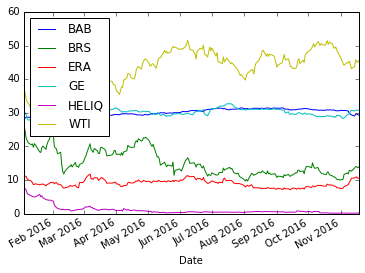

In [9]:
# Merge WTI into stock data
df = df.merge(wti, left_index=True, right_index=True, how='right')
df.head()

# Plot data
df.plot()
plt.show()

In [ ]:
fig = plt.figure(figsize=[7,5])
ax1 = plt.subplot(111)
line = wticl1_last.tail(568).plot(color='red',linewidth=3)
ax1.set_ylabel('USD per barrel')
ax1.set_xlabel('')
ax1.set_title('WTI Crude Oil Price', fontsize=18)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis='x', which='major', labelsize=8)
fig.text(0.15, 0.85,'Last: $' + str(wticl1.Last[-1])\
         + ' (as of: ' \
         + str(wticl1.index[-1].strftime('%Y-%m-%d'))\
         + ')');
fig.text(0.15, 0.80,'Change: $' + str(wticl1.Change[-1])\
         + '; ' \
         + str((np.round((wticl1.PctCh[-1] * 100), \
         decimals=2))) + '%')
fig.text(0.1, 0.06, 'Source: ' + url)
fig.text(0.1, 0.02, 'briandew.wordpress.com')
#plt.savefig('oil.png', dpi=1000)

Using the `df.corr()` command, we can easily compute and visualize the correlations between the stocks we downloaded in the previous step:

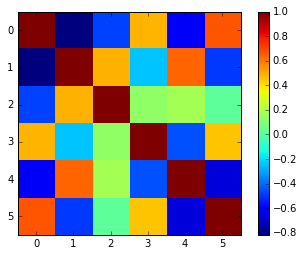

In [18]:
corrs = df.corr()
plt.imshow(corrs, interpolation='nearest')
plt.colorbar()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115ad2c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ad759b0>]], dtype=object)

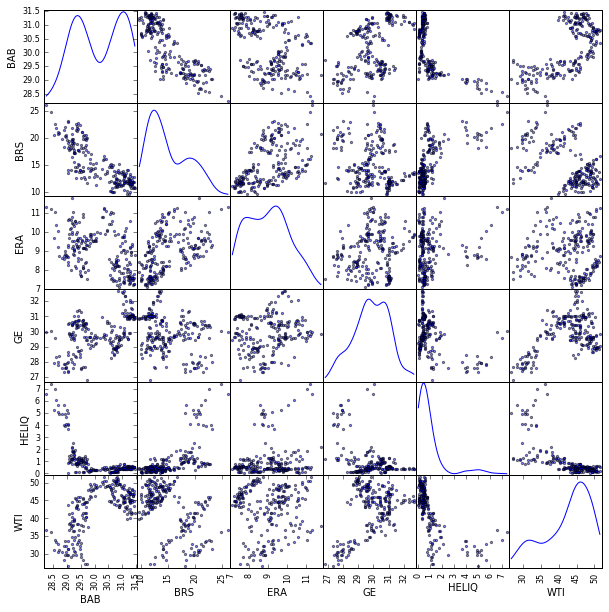

In [14]:
pd.scatter_matrix(df, figsize=(10, 10), diagonal='kde')